In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [85]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [86]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df.shape

(42000, 785)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [89]:

import matplotlib.pyplot as plt


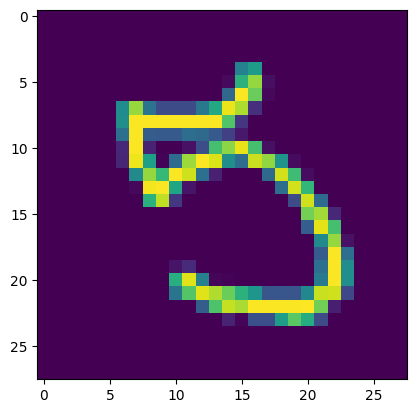

In [90]:
plt.imshow(df.iloc[1306,1:].values.reshape(28,28))

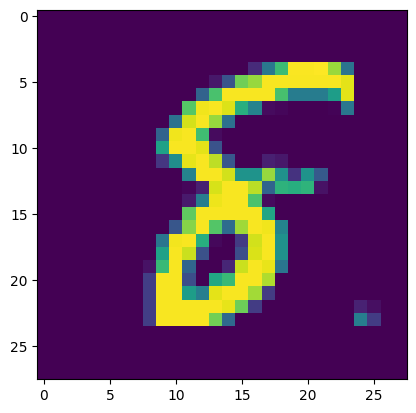

In [91]:
plt.imshow(df.iloc[1351,1:].values.reshape(28,28))

In [92]:
X=df.iloc[:,1:]
y = df.iloc[:,0]

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_trian,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
X_trian.shape

(33600, 784)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.fit(X_trian,y_train)

KNeighborsClassifier()

In [99]:
import time

start = time.time()

y_pred = knn.predict(X_test)
print(time.time() - start)

9.957738876342773


In [100]:
from sklearn.metrics import accuracy_score


In [101]:
accuracy_score(y_test,y_pred)

0.9648809523809524

# we use PCA

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
X_train = scaler.fit_transform(X_trian)
X_test = scaler.transform(X_test)

In [105]:
from sklearn.decomposition import PCA 

In [106]:
pca =PCA(n_components=100)

In [107]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [108]:
X_train_trf.shape

(33600, 100)

In [109]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [110]:
y_pred_trf = knn.predict(X_test_trf)

In [111]:
accuracy_score(y_test,y_pred_trf)

0.9541666666666667

We decided to only consider the top 100 features and train models, achieving a 95% accuracy after reducing features. The reason behind this is that using all features would take a considerable amount of time with almost the same accuracy. Now, we understand that PCA is crucial because it allows models to be trained on important features, saving time.

In [72]:
#using all features would be time-consuming with similar accuracy
for i in range (1,784):
    pca =PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred_trf = knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred_trf))
    

0.25761904761904764
0.32345238095238094
0.5107142857142857
0.6664285714285715
0.7385714285714285
0.8226190476190476
0.8438095238095238
0.8721428571428571
0.886547619047619
0.9055952380952381
0.911547619047619
0.9178571428571428
0.9277380952380953
0.9342857142857143
0.9388095238095238
0.9383333333333334
0.9403571428571429
0.9422619047619047
0.9425
0.9441666666666667
0.9433333333333334
0.9435714285714286
0.9445238095238095
0.9451190476190476
0.9484523809523809
0.9485714285714286
0.9482142857142857
0.9469047619047619
0.9498809523809524
0.9489285714285715
0.9510714285714286
0.9523809523809523
0.9507142857142857
0.9503571428571429


KeyboardInterrupt: 

##### It appears that there is no error; we simply stopped the model.

In [112]:
pca  = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [113]:
X_train_trf

array([[-2.71867397, -0.49070676],
       [-0.67695078, -6.7528344 ],
       [-3.03319697,  6.51050034],
       ...,
       [ 2.14887645,  0.7816839 ],
       [ 1.05950953,  0.94630013],
       [17.70254744,  1.96132228]])

In [119]:
# import plotly.express as px 
# X_train_trf =y_train.astype(str)
# fig = px.scatter(x=X_train_trf[:,0],
#                 y=X_train_trf[:,1],
#                 color = X_train_trf,
#                 color_discrete_sequence=px.colors.qualitative.G10
#                 )

In [126]:


# Create DataFrames for visualization
df_train = pd.DataFrame(X_train_trf, columns=['PC1', 'PC2'])
df_train['Class'] = y_train  # Assuming y_train is your target variable

df_test = pd.DataFrame(X_test_trf, columns=['PC1', 'PC2'])

# Scatter plot for training data with different colors
fig_train = px.scatter(df_train, x='PC1', y='PC2', color='Class', title='PCA - Training Data')
fig_train.show()




In [127]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd


# Apply PCA with 3 components
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

# Create DataFrames for visualization
df_train = pd.DataFrame(X_train_trf, columns=['PC1', 'PC2', 'PC3'])
df_train['Class'] = y_train  # Assuming y_train is your target variable

df_test = pd.DataFrame(X_test_trf, columns=['PC1', 'PC2', 'PC3'])

# Scatter plot for training data with different colors
fig_train = px.scatter_3d(df_train, x='PC1', y='PC2', z='PC3', color='Class', title='PCA - Training Data')
fig_train.show()




In [133]:
#eigen values
pca.explained_variance_ratio_

array([0.44085413, 0.08882541, 0.02631906])

In [132]:
#eigen vactor
pca.components_.shape

(3, 784)

Now, let's observe how much variance each eigenvector can explain. Our goal is to select the top eigenvector that collectively contribute to 90% of the variance. We will choose the corresponding eigenvectors associated with these top eigenvector to capture the most significant features in the data.

In [134]:
# Apply PCA with all components
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)


In [135]:
pca.explained_variance_.shape

(784,)

In [136]:
pca.components_.shape

(784, 784)

In [137]:
pca.explained_variance_ratio_

array([4.40854130e-01, 8.88254141e-02, 2.63190623e-02, 1.86157979e-02,
       1.74700328e-02, 1.62098131e-02, 1.31478863e-02, 1.15233292e-02,
       1.00489759e-02, 8.85046974e-03, 8.24429346e-03, 7.41444388e-03,
       7.06481442e-03, 6.62723499e-03, 6.58124174e-03, 6.32964080e-03,
       5.93594815e-03, 5.83019972e-03, 5.63196074e-03, 5.54500120e-03,
       5.24201298e-03, 5.05469785e-03, 4.90648150e-03, 4.83042084e-03,
       4.68048667e-03, 4.51565703e-03, 4.41262453e-03, 4.09597656e-03,
       4.03773467e-03, 3.91515054e-03, 3.79534483e-03, 3.68174773e-03,
       3.51897665e-03, 3.38347337e-03, 3.30251117e-03, 3.22730991e-03,
       3.13613942e-03, 3.02779414e-03, 2.93955646e-03, 2.84054728e-03,
       2.82222423e-03, 2.80518467e-03, 2.69552057e-03, 2.65916251e-03,
       2.64513621e-03, 2.53917205e-03, 2.49073584e-03, 2.46844629e-03,
       2.44032277e-03, 2.36825107e-03, 2.32908082e-03, 2.27841255e-03,
       2.20937828e-03, 2.17092729e-03, 2.11906907e-03, 2.09272372e-03,
      

In [139]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44085413, 0.52967954, 0.55599861, 0.5746144 , 0.59208444,
       0.60829425, 0.62144214, 0.63296547, 0.64301444, 0.65186491,
       0.66010921, 0.66752365, 0.67458846, 0.6812157 , 0.68779694,
       0.69412658, 0.70006253, 0.70589273, 0.71152469, 0.71706969,
       0.7223117 , 0.7273664 , 0.73227288, 0.7371033 , 0.74178379,
       0.74629945, 0.75071207, 0.75480805, 0.75884578, 0.76276093,
       0.76655628, 0.77023803, 0.773757  , 0.77714048, 0.78044299,
       0.7836703 , 0.78680644, 0.78983423, 0.79277379, 0.79561433,
       0.79843656, 0.80124174, 0.80393726, 0.80659643, 0.80924156,
       0.81178074, 0.81427147, 0.81673992, 0.81918024, 0.82154849,
       0.82387757, 0.82615598, 0.82836536, 0.83053629, 0.83265536,
       0.83474808, 0.83683309, 0.83886351, 0.84081051, 0.84275011,
       0.84466232, 0.84653634, 0.84838243, 0.85016293, 0.85193234,
       0.85369586, 0.85541788, 0.85708229, 0.85872741, 0.86035976,
       0.86193664, 0.86350778, 0.86506727, 0.86657887, 0.86807

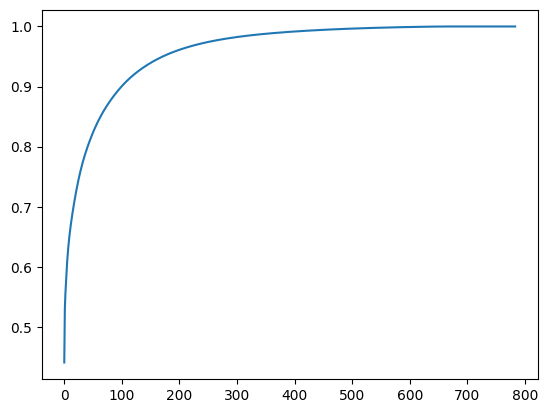

In [140]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [141]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))